# Assignment 2

### Question 1) 
Read the "earthquake.csv" file as a DataFrame object. 
Each row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp as "incident date" and a location as "latitude" and "longitude". Print the first 10 records for these 3 columns.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
earthquake = pd.read_csv("earthquake.csv")
earthquake[["INCIDENT DATE","LATITUDE","LONGITUDE"]].head(10)

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


### Question 2)
The CATEGORY field contains a comma-separated list of codes indicating the type of message. Check the rows for missing values in "CATEGORY" column. Show which entries in a dataFrame are missing.

In [2]:
a = earthquake.loc[pd.isnull(earthquake["CATEGORY"])]
earthquake1 = earthquake[earthquake["CATEGORY"].notna()]
a

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
1198,2777,"Food needed in Castro area, near airport 10 De...",24/01/2010 23:31,10 Dessaline Road,hungry grangou. We are in the Cit?? Castro a...,NaN,18.567320,-72.293280,YES,NO
1531,2436,Food Needed in Fontamara 27,22/01/2010 23:04,Fontamara 27 (off Rue National 2) Coordinates ...,NOU NAN FONTAMARA 27 PROLONGE NOU PA WE PES?N\...,NaN,18.532570,-72.367540,YES,NO
1828,2130,"15 People, 5 Babies, Water and Food Needed at ...",23/01/2010 18:07,Airport Runway Entrance - one end of the runwa...,nou sou wout aewopo a antre pis la nou se 15 f...,NaN,18.580320,-72.312390,YES,NO
2620,1182,Trapped person,19/01/2010 05:19,"Delmas, 33 Rue Derrosier Impas Du Crist, Numbe...",Mwen.se MADAM LAINE FRITZ MWEN RETE DELMAS 33 ...,NaN,18.559451,-72.295522,YES,NO
2622,1179,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.431400,-72.787200,YES,NO
2623,1178,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.424764,-72.770300,YES,NO


### Question 3) 

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, call the describe function to show that there are some aberrant locations.
Clean the bad locations by considering conditions below and remove the missing categories. 

Conditions for location: 
- Latitude should be range of between 18 and 20
- Longitude should be range of between -70 and -75
            

In [3]:
b = earthquake.index[(earthquake["LATITUDE"]>20) | (earthquake["LATITUDE"]<18) | (earthquake["LONGITUDE"]>-70) | (earthquake["LONGITUDE"]<-75)].tolist()
newEarthquake = earthquake1.drop(b,axis=0)
newEarthquake.reset_index(drop=True,inplace=True)
newEarthquake

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
2,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
3,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
4,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
...,...,...,...,...,...,...,...,...,...,...
3564,8,Canape Vert road destroyed,13/01/2010 02:57,Port-au-Prince,"Canape Vert, one of the main roads that leads ...","5c. Route barree | Road blocked,",18.539167,-72.335000,YES,NO
3565,7,Collapsed Building -- People Trapped,12/01/2010 09:55,"Delmas 19, Rue Mackendal #8 Port-au-Prince, Haiti",My mother is part of a medical team that had j...,"5a. Structure effondres | Collapsed structure,...",18.539269,-72.336408,YES,NO
3566,6,Eye-Witness Report from Hotel Oloffson,12/01/2010 11:16,"Ave Christophe #60, Port au Prince, Haiti","Tequila Minsky, a New York-based photographer ...","5a. Structure effondres | Collapsed structure,",18.538328,-72.333067,YES,NO
3567,5,Port-au-Prince air traffic control tower damag...,12/01/2010 04:08,"Airport, Port-au-Prince, Haiti",NBC reports Port-au-Prince air traffic control...,"5b. Structures a risque | Unstable Structure,",18.579721,-72.292778,YES,NO


Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, write the functions to get a list of all the categories and to split each category into a code and an English name

In [4]:
def makeList():     #This function creates list of all categories
    categoryList = newEarthquake["CATEGORY"].values.tolist()
    splittedList = []
    for i in categoryList:
        splittedList.append(i.split(",")[0:-1])
    return splittedList

You can better understand how to write a function by looking at the result obtained from the **_get english_** function below.

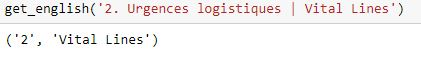

In [5]:
def get_english():     #This function determines category contains either one or more categories 
    textList = makeList()
    for text in textList:
        if len(text)>1:
            for i in range(len(text)):
                search(text[i])
        else:
            search(text[0])
def search(text):   #This function selects English results via index
    if "|" in text:
        newL = []
        newText = str(text)
        splitted = newText.split(".")
        num = splitted[0].replace(' ','')
        eng = splitted[1].split("|")[1]
        print("('"+num+"','"+eng+"')")

    else:
        newL = []
        newText = str(text)
        splitted = newText.split(".")
        num = splitted[0].replace(' ','')
        eng = splitted[1]
        print("('"+num+"','"+eng+"')")
#get_english()        I didint call the function.Because output has so much rows    

### Question 4)

Write a function to make a dict mapping code to name for "CATEGORY" column.

In [6]:
def makedict():
    newList = makeList()
    process = []
    for elements in newList:
        for i in elements:
            process.append(i)
    dictList = set(process)
    englishDict = {}
    for elements in dictList:
        element = elements.split(".")
        key = element[0].replace(' ','')
        value = element[1].split("|")[-1]
        englishDict[key] = value
    return englishDict

You can better understand how to write a function by looking at the result obtained from the **_english_mapping_** below.

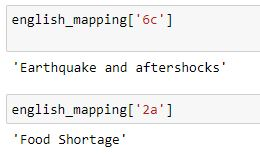

In [7]:
def english_mapping(key):
    englishMap = makedict()
    print(englishMap.get(key))
english_mapping("6c")
english_mapping("2a")

 Earthquake and aftershocks
 Food Shortage


### Question 5) 
Read the "births.csv" file as a DataFrame object. Use a pivot table to understand the data. Add a column called "quinquennial" to analyze male and female total births every five years.

In [8]:
births = pd.read_csv("births.csv")
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [9]:

newBirths = births.pivot_table("births",["year","gender"],aggfunc="sum").reset_index()
fiveYear = newBirths.groupby(newBirths.index//10)["births"].sum()
fiveYearBirths = []
fiveYears = []
for i in range(newBirths.loc[0,"year"],newBirths.loc[len(newBirths)-1,"year"],5):
    fiveYears.append(i)
for i in range(len(fiveYear)):
    j = 10
    while j!=0:
        fiveYearBirths.append(fiveYear[i])
        j-=1
newBirths["Quinquennial"] = fiveYearBirths
j=0
k=9
for i in range(len(fiveYears)):
    for x in range(1):
        newBirths.loc[j:k,"year"] = fiveYears[i]
        j+=10
        k+=10
newBirths1 = newBirths.pivot_table("births",["year","gender"],aggfunc="sum" ).reset_index()
updatedBirths = newBirths1.pivot_table(index=["year"],columns=["gender"],values="births")
updatedBirths

gender,F,M
year,,
1969,8435021,8878893
1974,7875851,8295271
1979,8812871,9268698
1984,9229605,9696731
1989,9954853,10443050
1994,9563803,10020529
1999,9855441,10326846
2004,10308378,10808537


### Question 6)
Plot the total number of US births by year and gender to see the annual trend in births by gender. Make your own comment for the graph.

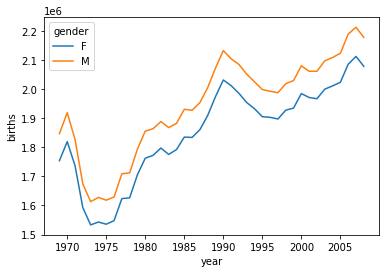

In [10]:
a = births.pivot_table("births",["year","gender"],aggfunc="sum").reset_index()
sns.lineplot(x="year",y="births",hue="gender",data=a)
plt.show()

### Question 7)
Display the mean of birth values for females and males in the same histogram.

Note: x-axis: mean values, y-axis: year of birth

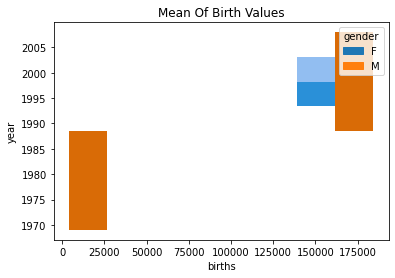

In [11]:
b = births.groupby(["year","gender"]).mean().drop(columns=["month","day"])
sns.histplot(x="births",y="year",hue="gender",data = b)
plt.title("Mean Of Birth Values")
plt.show()

### Question 8)

Read the "tip.csv" file as a DataFrame object. Add a column presents tip percentage of total bill and generate a KDE (Kernel Density Estimate) plot.


Text(0.5, 1.0, 'Tip Percentage Of Total Bill')

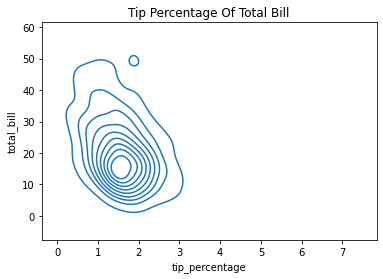

In [13]:
tipdf = pd.read_csv("tip.csv")
percentage = []
for i in range(len(tipdf)):
    total = tipdf.loc[i,"total_bill"]
    tip = tipdf.loc[i,"tip"]
    percentage.append(10*tip/total)
tipdf["tip_percentage"] = percentage
sns.kdeplot(x = "tip_percentage",y = "total_bill",data = tipdf)
plt.title("Tip Percentage Of Total Bill")

### Question 9)
Group the tip data by sex and smoker to present mean and standard deviation scores for tip percentage.

In [14]:
a = tipdf.groupby(["sex","smoker"])
a.describe().tip_percentage[["std","mean"]]

std      mean
sex    smoker                    
Female No      0.364212  1.569210
       Yes     0.715945  1.821504
Male   No      0.418488  1.606687
       Yes     0.905879  1.527712

### Question 10)
Create a stacked bar plot displaying the frequency of data points for each size on each day

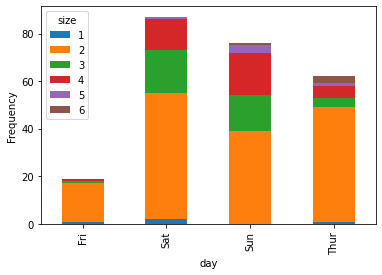

In [17]:
newDf = tipdf.filter(["day","size"])
bar = newDf.pivot_table(index="day",columns="size",aggfunc=len,fill_value=0)
bar.plot(kind="bar",stacked = True)
plt.ylabel("Frequency")
plt.show()

### Question 11)

Create a new stacked bar plot that has normalized values from a graph at Q10 so that each row sums to 1.

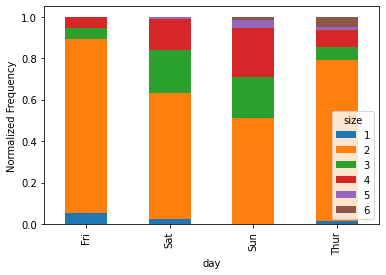

In [18]:
for i in range(len(bar)):
    x = 1/sum(bar.iloc[i])
    for j in range(len(bar.columns)):
        bar.iloc[i,j] = bar.iloc[i,j]*x
bar.plot(kind="bar",stacked = True)
plt.ylabel("Normalized Frequency")
plt.show()